In [2]:
from src.distances import distances_df
import plotly.express as px

In [9]:
df = distances_df(gallery="movies")
df2 = df.pivot_table(index="from_spec", columns="notation", values="cd", aggfunc="median")#.rank(method="first")
#df2["mean"] = df2.rank(method="first").mean(axis=1).rank(method="first")
df2["mean"] = df2.mean(axis=1)
#df2 = df2.sort_values("mean").drop("mean", axis=1)

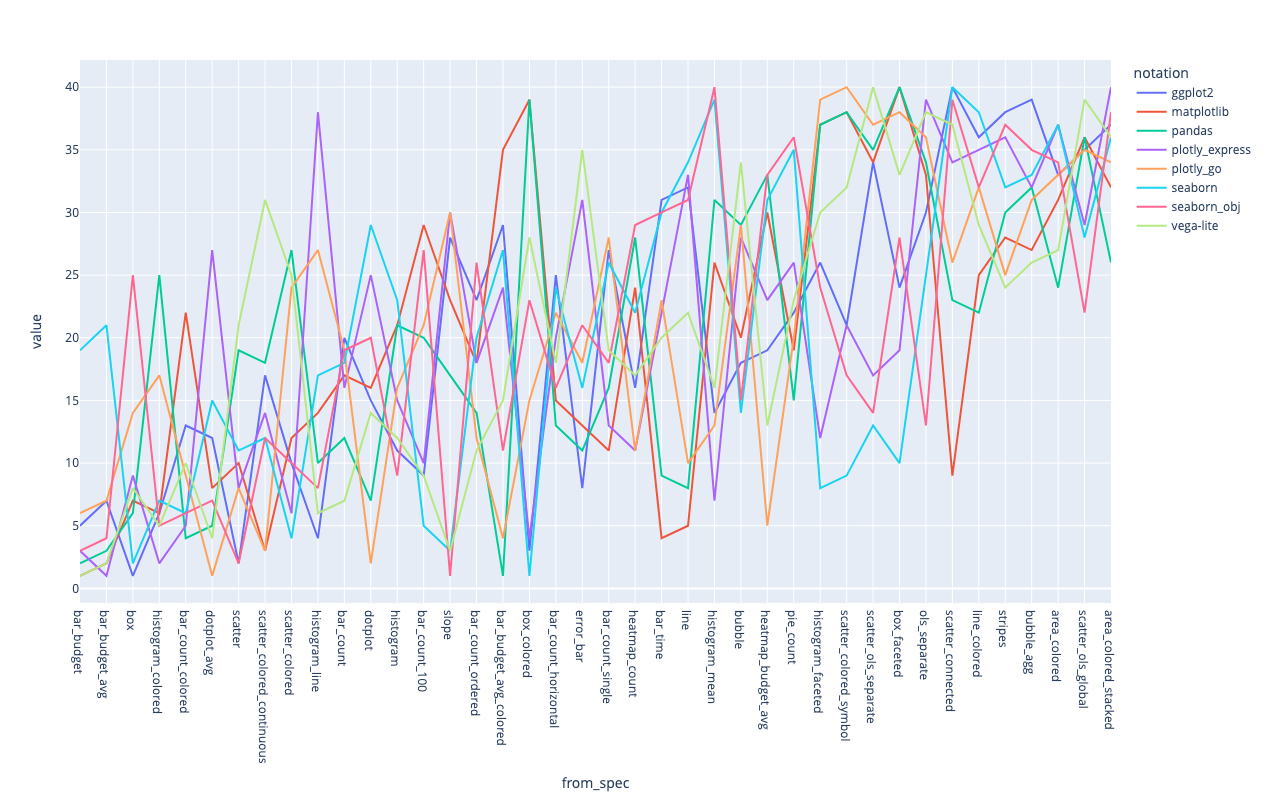

In [4]:
px.line(df2, height=800)

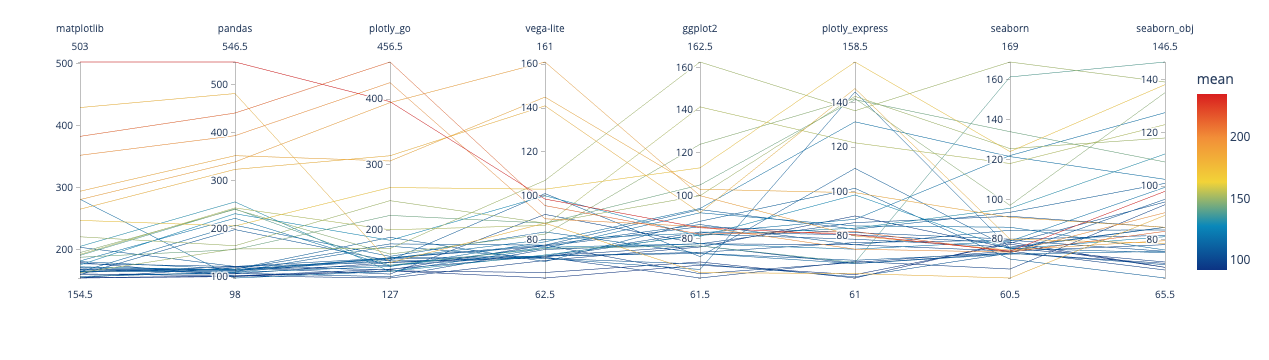

In [10]:
px.parallel_coordinates(df2, dimensions=["matplotlib", "pandas", "plotly_go", "vega-lite", "ggplot2", "plotly_express", "seaborn", "seaborn_obj"], 
color="mean", color_continuous_scale="Portland")

In [79]:
from scipy.stats import spearmanr

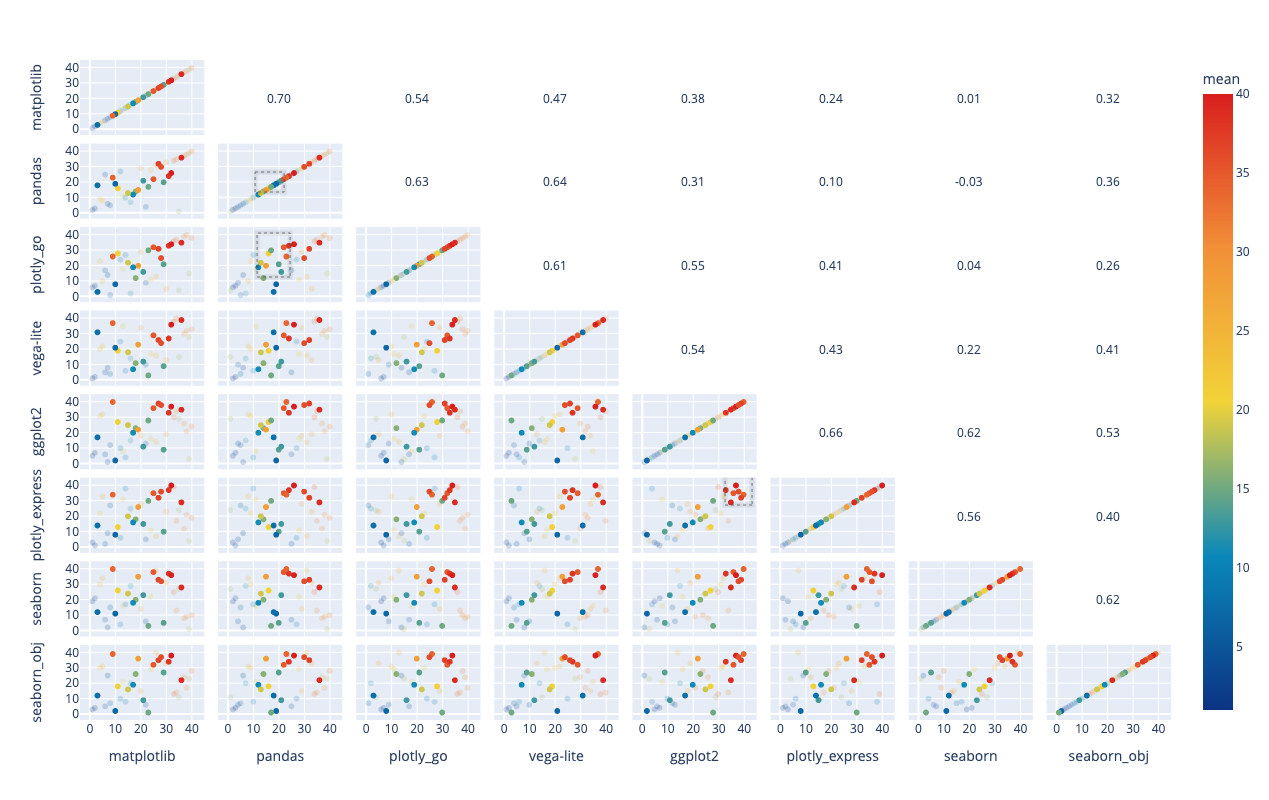

In [118]:
notations = ["matplotlib", "pandas", "plotly_go", "vega-lite", "ggplot2", "plotly_express", "seaborn", "seaborn_obj"]
fig = px.scatter_matrix(df2, dimensions=notations, color="mean", color_continuous_scale="Portland", height=800)
fig.update_traces(diagonal_visible=True, showupperhalf=False)
for i, n in enumerate(notations):
    i += 1
    #fig.update_layout({f"xaxis{i}": dict(title=""), f"yaxis{i}": dict(title="")})
    #fig.add_annotation(showarrow=False, text=n, xref=f"x{i}", yref=f"y{i}", x=20, y=20)
    for j, n2 in enumerate(notations):
        j+=1
        if i > j:
            res = spearmanr(df2[n], df2[n2])
            fig.add_annotation(text="%.2f" % res.correlation, xref=f"x{i}", yref=f"y{j}", x=20, y=20, showarrow=False)
        
fig